# IEE352 - Filtrado de Procesos Aleatorios

In [10]:
import numpy as np
import scipy.signal 
import matplotlib.pyplot as plt
#from matplotlib import cm
%matplotlib inline
plt.rcParams['font.size'] = '10'

Text(0.5, 1.0, 'Ruido Blanco Gaussiano')

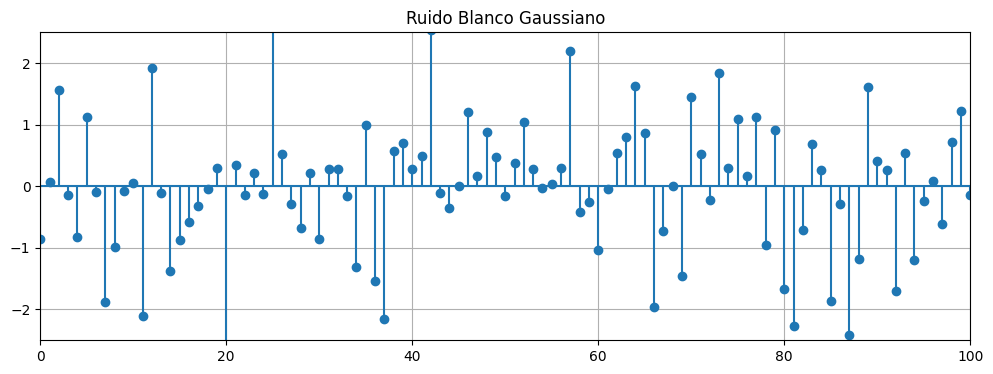

In [11]:
# Ruido Blanco
N = 10000

xn = np.random.randn(N)

plt.figure(figsize=[12,4])
plt.stem(xn,basefmt="")
plt.grid('on')
#plt.xlabel('$n$')
plt.xlim([0,100])
plt.ylim([-2.5,2.5])
plt.title('Ruido Blanco Gaussiano')


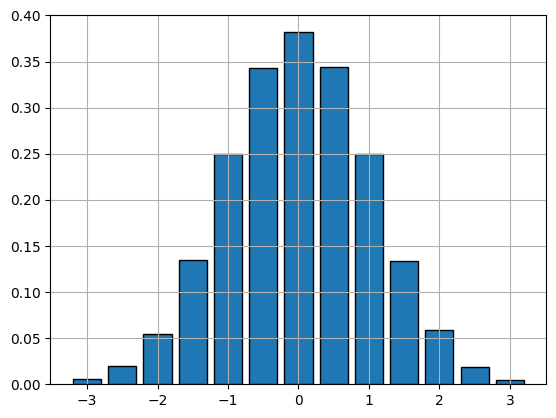

In [12]:
# Calculando las distribuciones correspondientes
xrange = [-3,3]

Nb = 13
dx = (xrange[1] - xrange[0]) / (Nb-1)
bins = xrange[0]-dx/2 + np.arange(Nb+1)*dx

plt.figure()
plt.hist(xn,bins=bins,rwidth=0.8,align='mid',ec='k',density=True)
plt.grid('on')


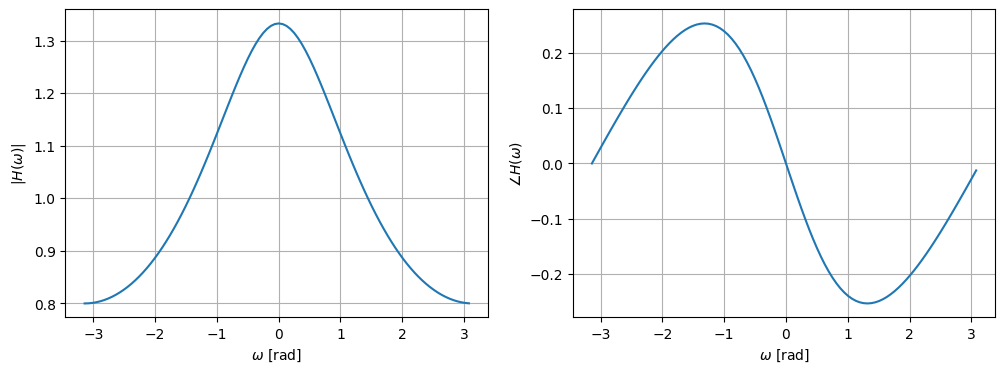

In [13]:
# Definiendo un filtro
Nw = 100
w = 2*np.pi*(np.arange(Nw)-Nw/2)/Nw
Hw = 1/(1-0.25*np.exp(-1j*w))

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(w,np.abs(Hw))
plt.xlabel("$\omega$ [rad]")
plt.ylabel("$|H(\omega)|$")
plt.grid('on')
plt.subplot(1,2,2)
plt.plot(w,np.angle(Hw))
plt.xlabel("$\omega$ [rad]")
plt.ylabel("$\\angle H(\omega)$")
plt.grid('on')

Text(0.5, 1.0, 'Ruido Blanco Gaussiano Filtrado')

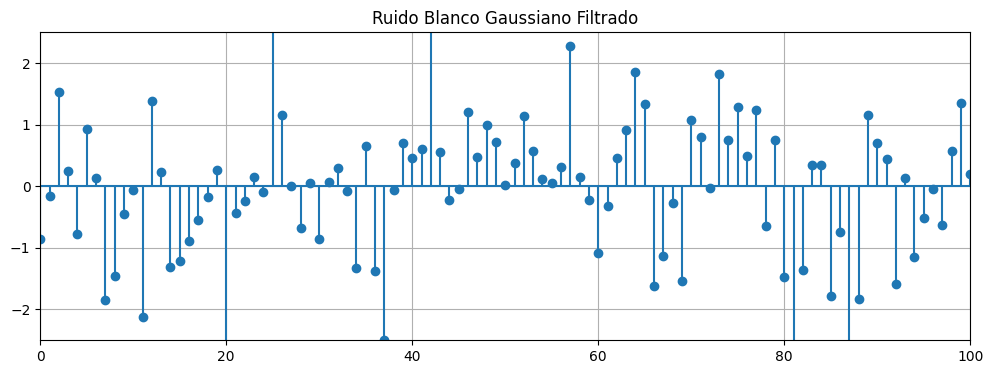

In [14]:
# Filtrando la señal de ruido
b = [1]
a = [1,-0.25]

yn = scipy.signal.lfilter(b,a,xn)

plt.figure(figsize=[12,4])
plt.stem(yn,basefmt="")
plt.grid('on')
#plt.xlabel('$n$')
plt.xlim([0,100])
plt.ylim([-2.5,2.5])
plt.title('Ruido Blanco Gaussiano Filtrado')


Text(0.5, 1.0, 'Autocorrelación de $Y[n]$')

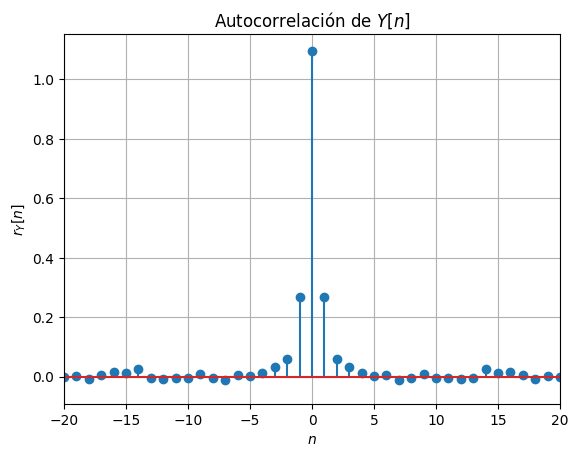

In [15]:
# Calculando la función de correlación
ry = np.correlate(yn,yn,mode="full") / N
nr = np.arange(2*N-1) - (N-1)

plt.figure()
plt.stem(nr,ry)
plt.grid('on')
plt.xlim([-20,20])
plt.xlabel("$n$")
plt.ylabel("$r_Y[n]$")
plt.title('Autocorrelación de $Y[n]$')

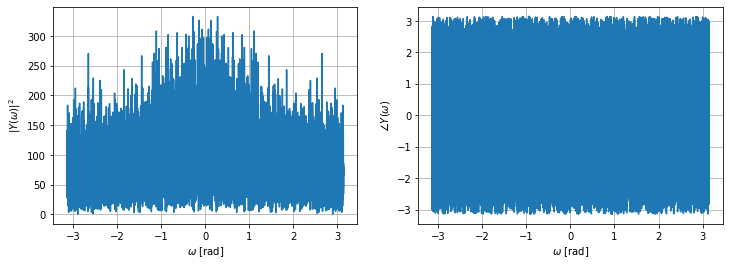

In [14]:
# Calculando la Transformada de Fourier
Yw = np.fft.fftshift(np.fft.fft(yn))
wn = 2*np.pi*(np.arange(N)-N/2)/N

plt.figure(figsize=[12,4])
plt.subplot(1,2,1)
plt.plot(wn,np.abs(Yw))
plt.xlabel("$\omega$ [rad]")
plt.ylabel("$|Y(\omega)|^2$")
plt.grid('on')
plt.subplot(1,2,2)
plt.plot(wn,np.angle(Yw))
plt.xlabel("$\omega$ [rad]")
plt.ylabel("$\\angle Y(\omega)$")
plt.grid('on')

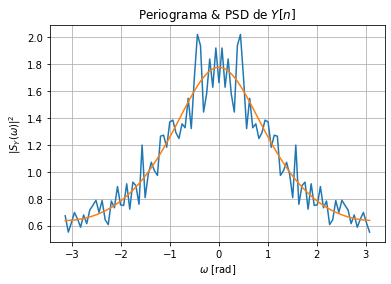

In [15]:
# Estimando el periodograma
M = 100
P = np.intp(N/M)
ynm = np.reshape(yn,(P,M))
Ymw = np.fft.fftshift(np.fft.fft(ynm,axis=1),axes=1)
SYw = np.mean(np.abs(Ymw)**2,0)/M
wm = 2*np.pi*(np.arange(M)-M/2)/M

plt.figure()
plt.plot(wm,SYw)
plt.plot(w,np.abs(Hw)**2)
plt.xlabel("$\omega$ [rad]")
plt.ylabel("$|S_Y(\omega)|^2$")
plt.title("Periograma & PSD de $Y[n]$")
plt.grid('on')

